In [1]:
"------------Collecting the Data----------------------------------------------------"
import pandas as pd
"--------------------------------------------------------------------------------------------------------------"
pd.set_option('display.max_columns', None)   # By doing so, columns never be terminated
pd.set_option('display.max_rows', None)      # By doing so, rows never be terminated
"---------------------------------------------------------------------------------------------------------------"

df1=pd.read_csv('fish.csv',header=None)
species=df1[0].values

In [2]:
samples=df1.drop(0,axis=1).values
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()
import numpy as np
inertia_matrix=[]
kmeans_values=np.arange(1,10)
for i in kmeans_values:
    model=KMeans(n_clusters=i)
    model.fit(samples)
    inertia_matrix.append(model.inertia_)

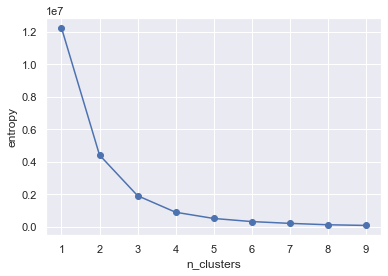

In [3]:
import matplotlib.pyplot as plt
plt.plot(kmeans_values, inertia_matrix, marker='o')
plt.xticks(kmeans_values)
plt.xlabel('n_clusters')
plt.ylabel('entropy')
plt.show()    

Conclusion:
- '4' seems to be the right choice for the number of clusters (Note: This data_set is 6-D). 

In [4]:
# Now I am going to fit KMeans by setting 4 number of clusters and print cross-tabulation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(samples)
lab=kmeans.predict(samples)
df1 = pd.DataFrame({'labels':lab,'species':species})
ct_1 = pd.crosstab(df1['labels'],df1['species'])
print(ct_1)

species  Bream  Pike  Roach  Smelt
labels                            
0           17    10      3      0
1           16     2      0      0
2            1     1     17     14
3            0     4      0      0


Conclusion:
- It is not a good result as the cluster of Roach and Smelt are coincide in the second row. However I was expecting that each row must clearly indicate only one species.
- Some time it happend due to high variances.
- In the next excercise I am going to check the variances of the data.

In [5]:
print("Variances of all the columns of the fish data set : ", samples[:,0].var(),samples[:,1].var(),samples[:,2].var(),samples[:,3].var(),samples[:,4].var(),samples[:,5].var())

Variances of all the columns of the fish data set :  143403.49889273357 125.95225743944637 146.72855916955018 172.1194823529412 105.8937993079585 4.430953633217994


Conclusion:
- As expected variances of the columns are very high. (For Ex: compare the variance of first column (143403.5) and the last column (4.4) )
- To handle this situation I am going to standerised the data using StandardScaler from sklearn.preprocessing in the following.

In [6]:
# Perform the necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

In [7]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1           33     0      1      0
2            0    17      0      0
3            1     0     19      1


Conclusion:
- It looks like the fish data separates really well into 4 clusters and each row dominated by one species of fish.